In [ ]:
pip install easyocr 

In [10]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [2]:

reader = easyocr.Reader(['en'])
def get_text(path):
    result = reader.readtext(path)
    text = []
    for box,word,prob in result:
        text.append(word.lower())
    return text


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [21]:
import pickle
import difflib
from collections import defaultdict

with open("products.p", "rb") as products_file:
    products_dict = pickle.load(products_file)

def correct_spelling(word, words):
    closest_matches = difflib.get_close_matches(word, words, n=1)
    return closest_matches[0] if closest_matches else word

def match_products(ocr_words, products_dict):
    match_counts = defaultdict(int)
    corrected_counts = defaultdict(int)
    matched_words = defaultdict(list)
    corrected_matched_words = defaultdict(list)

    for word in ocr_words:
        for product, associated_words in products_dict.items():
            if word.lower() in (w.lower() for w in associated_words):
                match_counts[product] += 1
                matched_words[product].append(word)

            corrected_word = correct_spelling(word, associated_words)
            if corrected_word.lower() in (w.lower() for w in associated_words):
                corrected_counts[product] += 1
                corrected_matched_words[product].append(corrected_word)

    best_match = max(match_counts, key=match_counts.get, default=None)
    best_corrected_match = max(corrected_counts, key=corrected_counts.get, default=None)

    return {
        'best_match': best_match,
        'best_corrected_match': best_corrected_match,
        'direct_matches': match_counts,
        'corrected_matches': corrected_counts,
        'matched_words': matched_words,
        'corrected_matched_words': corrected_matched_words
    }


In [22]:
path = 'D:\\sample.jpeg'

In [23]:
ocr_text = get_text(path)

In [27]:

results = match_products(ocr_text, products_dict)
if results['best_match']:
    print("Product Found :", results['best_match'])
else:
    print("Product Found:", results['best_corrected_match'])

Product Found : taj mahal


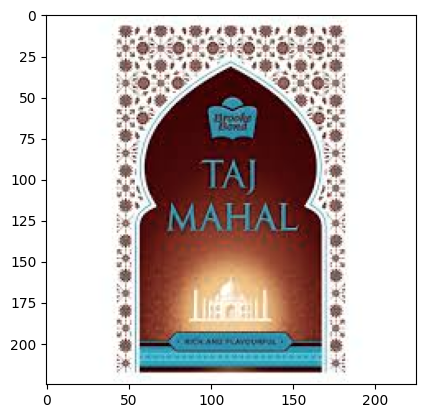

In [25]:
plt.imshow(cv2.imread(path))